In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pylab as plb
from PIL import Image, ImageFilter

import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf
#tf.enable_eager_execution()

In [4]:
# def extract_data(filename, num_images):
#    with gzip.open(filename) as bytestream:
#        bytestream.read(16)
#        buf = bytestream.read(28 * 28 * num_images)
#        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
#        data = data.reshape(num_images, 28,28)
#        return data

In [5]:
# train_data = extract_data('train-images-idx3-ubyte.gz', 60000)
# test_data = extract_data('t10k-images-idx3-ubyte.gz', 10000)

In [6]:
# def extract_labels(filename, num_images):
#    with gzip.open(filename) as bytestream:
#        bytestream.read(8)
#        buf = bytestream.read(1 * num_images)
#        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#        return labels

In [7]:
# train_labels = extract_labels('train-labels-idx1-ubyte.gz',60000)
# test_labels = extract_labels('t10k-labels-idx1-ubyte.gz',10000)

In [8]:
## Shapes of training set
# print("Training set (images) shape: {shape}".format(shape=train_data.shape))

## Shapes of test set
# print("Test set (images) shape: {shape}".format(shape=test_data.shape))

In [9]:
## Create dictionary of target classes
# label_dict = {
 # 0: 'A',
 # 1: 'B',
 # 2: 'C',
 # 3: 'D',
 # 4: 'E',
 # 5: 'F',
 # 6: 'G',
 # 7: 'H',
 # 8: 'I',
 # 9: 'J',
# }

In [10]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [11]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [12]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [13]:
x_trainDir = trainDir
x_testDir = testDir

In [14]:
x_trainDir

'C:\\Users\\hong ray\\Desktop\\FYP\\Aaron-Workspace\\FilteredImages\\train'

In [15]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList

trainingImagesDir = getImagesDir(trainDir)
testImagesDir = getImagesDir(testDir)

In [16]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            myImages.append(np.array(Image.open(image)))
        myFolder.append(np.array(myImages))
    return myFolder

#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [17]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [18]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [19]:
## Shapes of training set
print("Training set (images) shape: {shape}".format(shape=trainingImagesNP.shape))

## Shapes of test set
print("Test set (images) shape: {shape}".format(shape=testImagesNP.shape))

Training set (images) shape: (107,)
Test set (images) shape: (35,)


In [20]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [21]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test

npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 1000, 1)

In [22]:
print(newNPX_test.shape)

(1740, 101, 1000, 1)


In [23]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []
# y_neg_v = []
# pos_v = []
# y_pos_v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v

np_v = np.array(v)
# npY_test = np.array(Y_test)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 1000, 1)

In [24]:
print(newNPX_v.shape)

(2381, 101, 1000, 1)


In [25]:
npX = np.array(X)
npY = np.array(Y)

# print(npX)
# print(npY)

In [26]:
print(npX.shape)
print(npY.shape)

(4591, 101, 1000)
(4591,)


In [27]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)
print(newNPX.shape)

(4591, 101, 1000, 1)


In [28]:
newNPX = np.resize(newNPX, (npX.shape[0], 100, 1000, 1))
print(newNPX.shape)
newNPX_v = np.resize(newNPX_v, (np_v.shape[0], 100, 1000, 1))
print(newNPX_v.shape)
newNPX_test = np.resize(newNPX_test, (npX_test.shape[0], 100, 1000, 1))
print(newNPX_test.shape)

(4591, 100, 1000, 1)
(2381, 100, 1000, 1)
(1740, 100, 1000, 1)


In [29]:
# plt.figure(figsize=[5,5])

## Display the first image in training data
# plt.subplot(121)
# curr_img = np.reshape(train_data[0], (28,28))
# curr_lbl = train_labels[0]
# plt.imshow(curr_img, cmap='gray')
# plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

## Display the first image in testing data
# plt.subplot(122)
# curr_img = np.reshape(test_data[0], (28,28))
# curr_lbl = test_labels[0]
# plt.imshow(curr_img, cmap='gray')
# plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

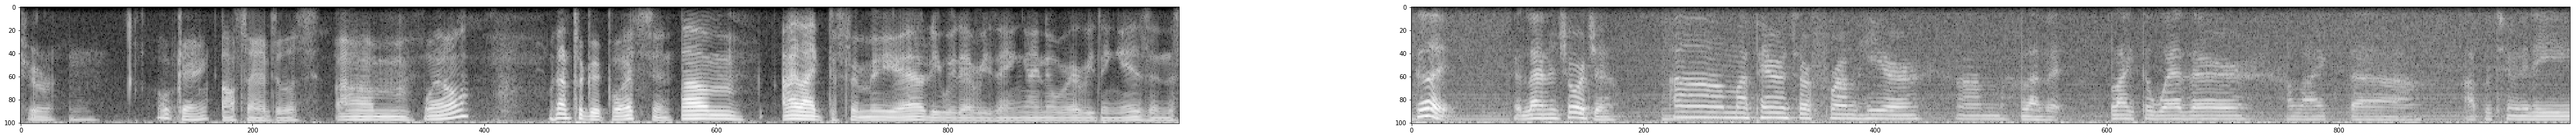

In [30]:
plt.figure(figsize=[75, 75])

# Display the first image in training data
plt.subplot(121)
curr_img = npX[0]
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np_v[0]
plt.imshow(curr_img, cmap='gray')

In [31]:
# train_data = train_data.reshape(-1, 28,28, 1)
# test_data = test_data.reshape(-1, 28,28, 1)
# train_data.shape, test_data.shape

In [32]:
# train_data.dtype, test_data.dtype

In [33]:
# np.max(train_data), np.max(test_data)

In [34]:
# train_data = train_data / np.max(train_data)
# test_data = test_data / np.max(test_data)

In [35]:
# np.max(train_data), np.max(test_data)

In [36]:
# from sklearn.model_selection import train_test_split
# train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
#                                                             train_data, 
#                                                             test_size=0.2, 
#                                                             random_state=13)

In [37]:
# batch_size = 128
# epochs = 50
# inChannel = 1
# x, y = 28, 28
# input_img = Input(shape = (x, y, inChannel))

In [38]:
#Saving Model
from keras.callbacks import ModelCheckpoint
numEpochs = 50
model_path = os.path.join(currentDir,'AutoencoderTest'+ str(numEpochs) + '.h5')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [39]:
noise_factor = 0.5
x_train_noisy = newNPX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX.shape)
x_valid_noisy = newNPX_v + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX_v.shape)
x_test_noisy = newNPX_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [40]:
print(x_valid_noisy.shape)

(2381, 100, 1000, 1)


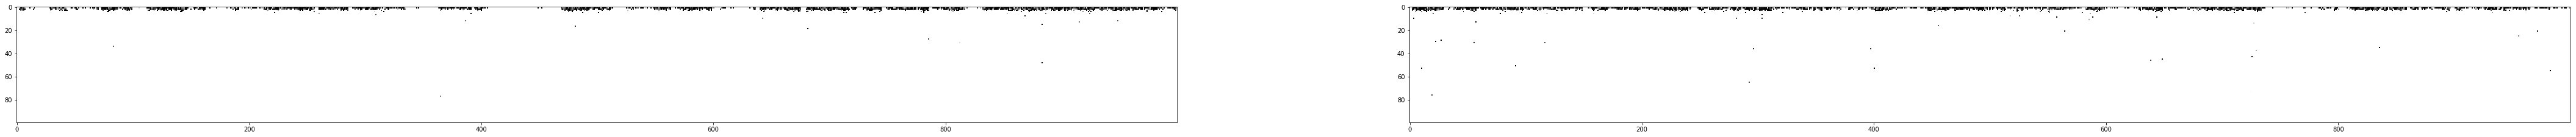

In [41]:
plt.figure(figsize=[75,75])

# Display the first image in training data
plt.subplot(121)
#x_train_noisy = npX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=npX.shape)
curr_img = x_train_noisy[1] 
curr_img = np.reshape(x_train_noisy[1], (100,1000))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
#x_test_noisy = npX_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=npX_test.shape)
curr_img = x_test_noisy[1]
curr_img = np.reshape(x_test_noisy[1], (100,1000))
plt.imshow(curr_img, cmap='gray')

In [42]:
batch_size = 128
epochs = 20
# inChannel = 1
# x, y = 28, 28
# input_img = Input(shape = (x, y, inChannel))

input_img = Input(shape = (100, 1000, 1))

np.max(newNPX), np.max(newNPX_test), np.max(newNPX_v)

W0729 10:23:00.678689  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 10:23:06.410124  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



(135, 137, 128)

In [43]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = AveragePooling2D(pool_size=(4,3))(conv6)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = AveragePooling2D(pool_size=(4,3))(conv7)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    conv9 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    up1 = UpSampling2D((2,2))(conv9)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    conv10 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
    up2 = UpSampling2D((2,2))(conv10)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    
    #flatten
    flatten1 = Flatten()(decoded)
    dense1 = Dense(256, activation='relu')(flatten1)
    dense2 = Dense(256, activation='relu')(dense1)
    dense3 = Dense(1)(dense2)
    activation1 = Activation('sigmoid')(dense3)
    
    return activation1

In [44]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(), metrics=['accuracy'])
autoencoder.summary()

W0729 10:23:09.865558  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 10:23:10.454316  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0729 10:23:10.573568  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0729 10:23:10.801925  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 1000, 1)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 1000, 32)     320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 1000, 32)     9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 25, 333, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 333, 64)       18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 333, 64)       36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 111, 64)        0         
__________

In [45]:
print(x_train_noisy.shape)

(4591, 100, 1000, 1)


In [46]:
autoencoder_train = autoencoder.fit(x=x_train_noisy, y=npY, batch_size=batch_size,epochs=epochs,validation_data=(x_test_noisy, npY_test))

W0729 10:23:11.613332  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0729 10:23:11.618319  6432 deprecation_wrapper.py:119] From C:\Users\hong ray\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4591 samples, validate on 1740 samples
Epoch 1/20
4591/4591 [==============================] - 776s 169ms/step - loss: 0.2806 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 2/20
4591/4591 [==============================] - 711s 155ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 3/20
4591/4591 [==============================] - 729s 159ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 4/20
4591/4591 [==============================] - 723s 157ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 5/20
4591/4591 [==============================] - 721s 157ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 6/20
4591/4591 [==============================] - 723s 158ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - val_acc: 0.5902
Epoch 7/20
4591/4591 [==============================] - 716s 156ms/step - loss: 0.2812 - acc: 0.7188 - val_loss: 0.4098 - va

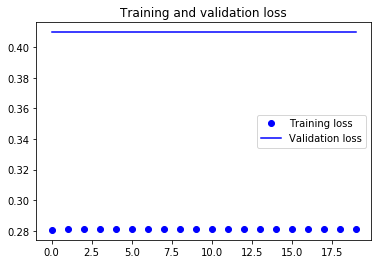

In [47]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

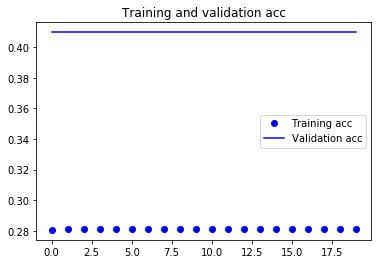

In [48]:
acc = autoencoder_train.history['acc']
val_acc = autoencoder_train.history['val_acc']
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [49]:
pred = autoencoder.predict(newNPX_v)

In [50]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

Test Images


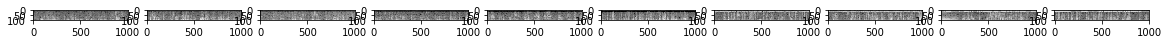

Test Images with Noise


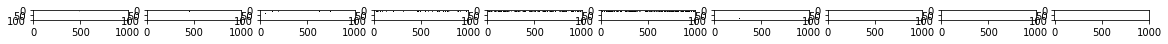

Reconstruction of Noisy Test Images


TypeError: Invalid dimensions for image data

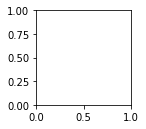

In [51]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(newNPX_v[i, ..., 0], cmap='gray')
    curr_lbl = npY_test[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [52]:
print("Model Accuracy: ", np.mean(autoencoder_train.history['acc']))

Model Accuracy:  0.7187976476667599


In [53]:
n_folds = 5
count = 0
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(newNPX, npY, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    autoencoder_kfold = autoencoder.fit(x=X_train, y=y_train, batch_size=batch_size,epochs=20,validation_data=(X_val, y_val))
    count += 1
    print('K-Fold has ran ', count, ' time(s)')
    
print('\nModel Accuracy after all K-Fold: ', (np.mean(autoencoder_kfold.history['acc'])))

Train on 4131 samples, validate on 460 samples
Epoch 1/20
4131/4131 [==============================] - 629s 152ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 2/20
4131/4131 [==============================] - 617s 149ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 3/20
4131/4131 [==============================] - 617s 149ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 4/20
4131/4131 [==============================] - 621s 150ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 5/20
4131/4131 [==============================] - 611s 148ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 6/20
4131/4131 [==============================] - 619s 150ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val_acc: 0.7022
Epoch 7/20
4131/4131 [==============================] - 622s 151ms/step - loss: 0.2794 - acc: 0.7206 - val_loss: 0.2978 - val

Epoch 19/20
4131/4131 [==============================] - 602s 146ms/step - loss: 0.2798 - acc: 0.7202 - val_loss: 0.2935 - val_acc: 0.7065
Epoch 20/20
4131/4131 [==============================] - 602s 146ms/step - loss: 0.2798 - acc: 0.7202 - val_loss: 0.2935 - val_acc: 0.7065
K-Fold has ran  3  time(s)
Train on 4131 samples, validate on 460 samples
Epoch 1/20
4131/4131 [==============================] - 604s 146ms/step - loss: 0.2803 - acc: 0.7197 - val_loss: 0.2891 - val_acc: 0.7109
Epoch 2/20
4131/4131 [==============================] - 603s 146ms/step - loss: 0.2803 - acc: 0.7197 - val_loss: 0.2891 - val_acc: 0.7109
Epoch 3/20
4131/4131 [==============================] - 603s 146ms/step - loss: 0.2803 - acc: 0.7197 - val_loss: 0.2891 - val_acc: 0.7109
Epoch 4/20
4131/4131 [==============================] - 602s 146ms/step - loss: 0.2803 - acc: 0.7197 - val_loss: 0.2891 - val_acc: 0.7109
Epoch 5/20
4131/4131 [==============================] - 602s 146ms/step - loss: 0.2803 - acc: 0.

In [55]:
autoencoder.save(model_path)

In [61]:
autoencoder_train

In [64]:
from keras.models import load_model
test_ae = load_model(model_path)

In [78]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)
print(newNPX.shape)
noise_factor = 0.5
x_train_noisy = newNPX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=newNPX.shape)
predictor = test_ae.predict(x_test_noisy, verbose=1)

(4591, 101, 1000, 1)
1740/1740 [==============================] - 44s 25ms/step


In [79]:
predictor[2]

array([0.], dtype=float32)

TypeError: Invalid dimensions for image data

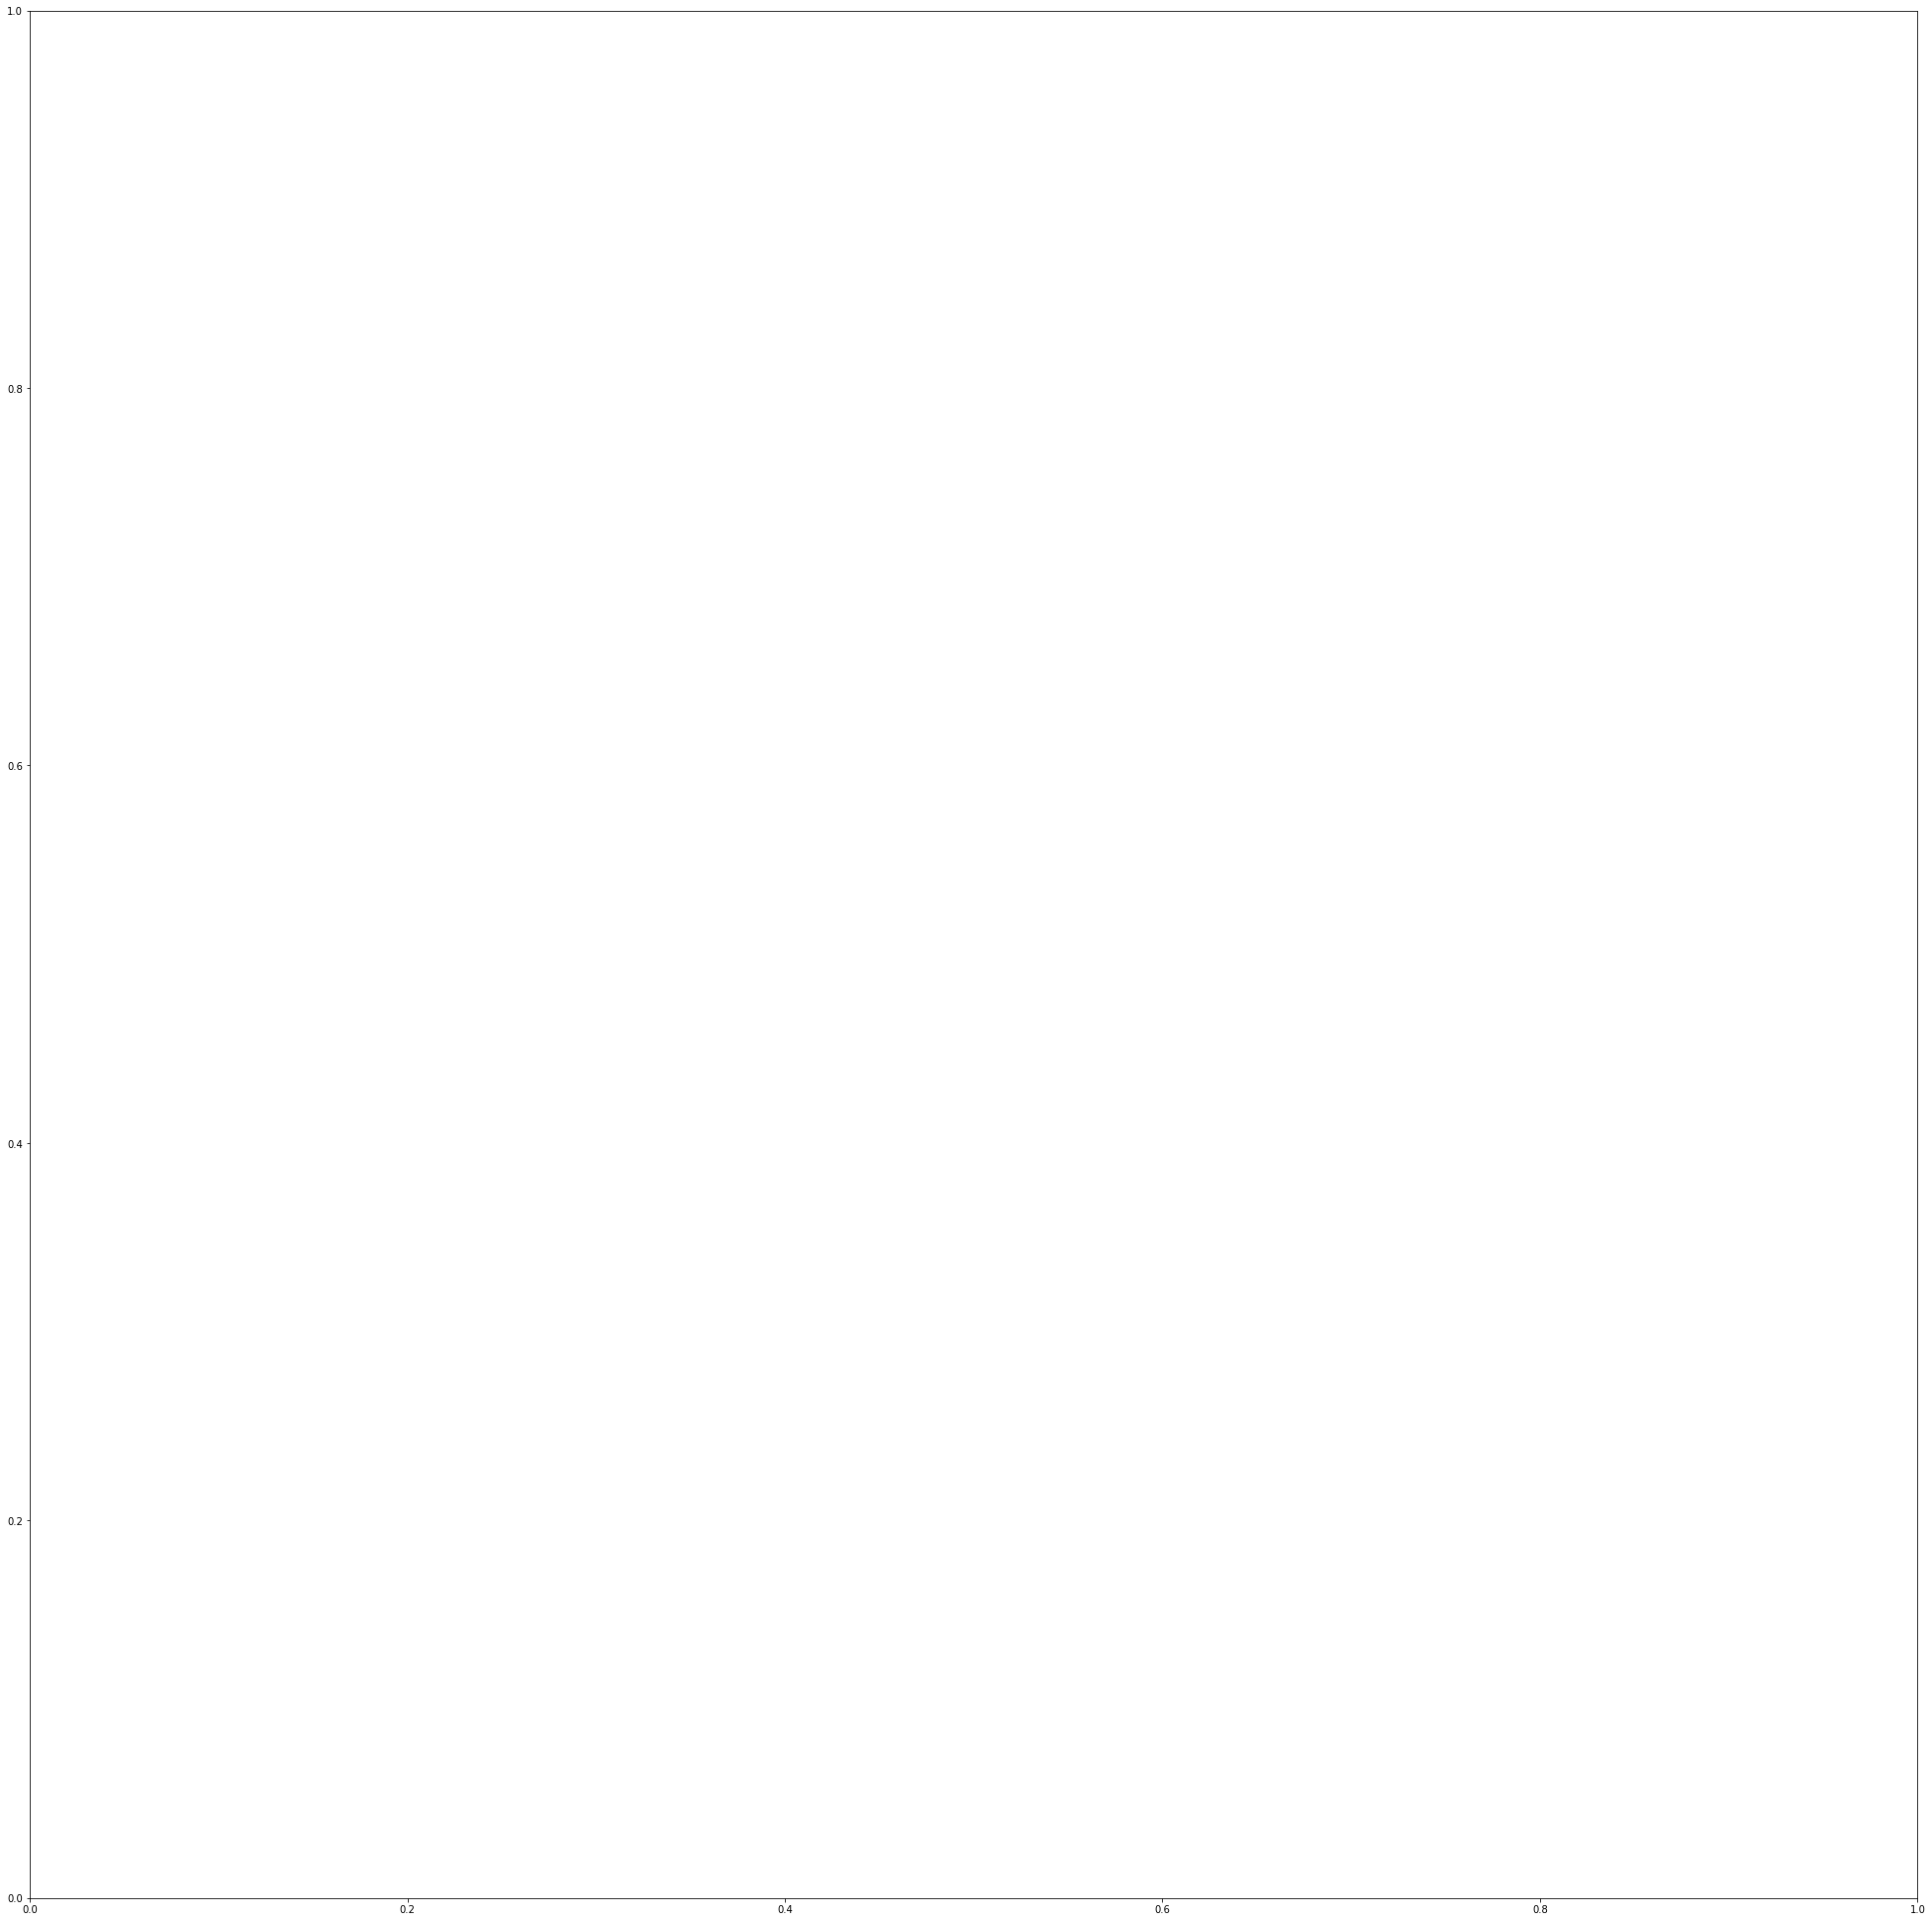

In [80]:
plt.figure(figsize=[75, 75])

plt.subplot(121)
curr_img = predictor[2]
plt.imshow(curr_img, cmap='gray')